In [23]:
df = pd.read_csv("COVID-19 Cases.zip")
df = df[["Country_Region", "Case_Type", "Date", "Cases"]]
df = df[(df.Country_Region == "Pakistan") & (df.Case_Type == "Deaths")]
df.Date = pd.to_datetime(df.Date)
df = df.sort_values("Date")
df1 = df[["Cases"]]#.plot()
df1.index = df.Date
df1 = df1[df1.Cases != 0]

/home/amir/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


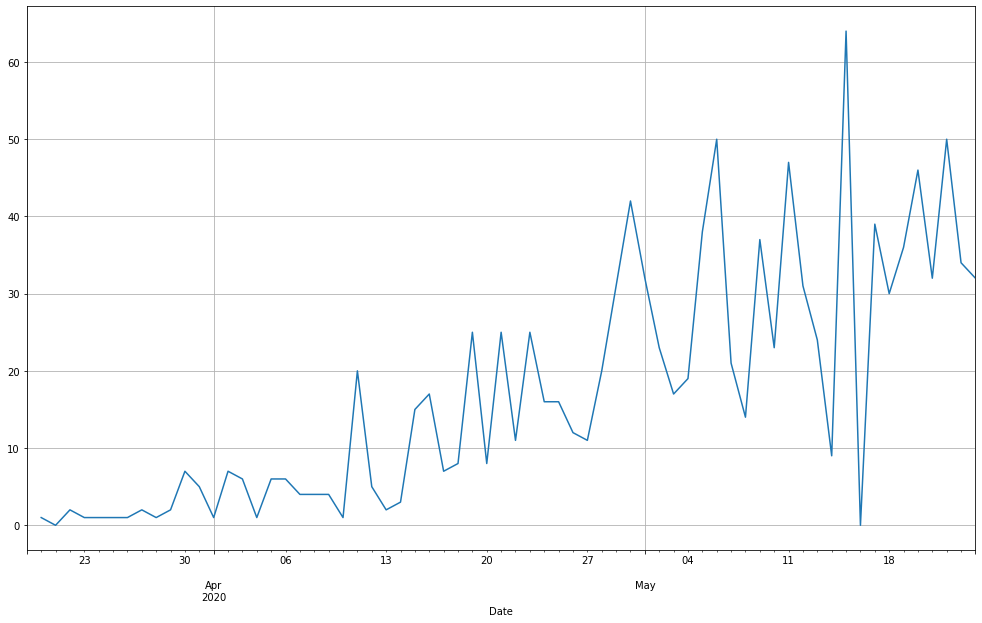

In [31]:
df1.Cases.diff().plot(figsize=(17,10))
plt.grid(1)

/home/amir/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


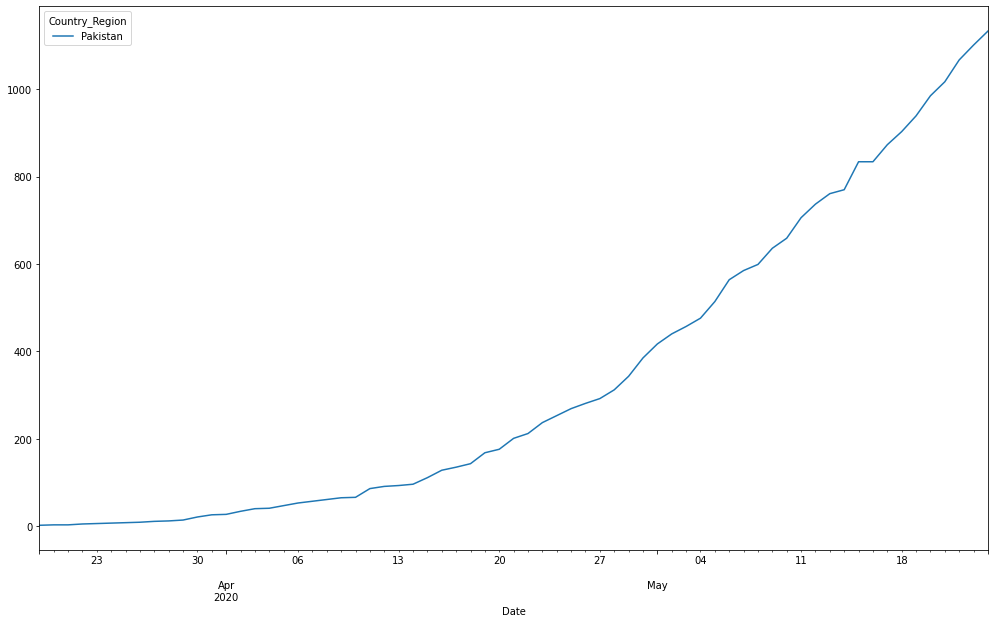

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
# Data source: https://data.world/covid-19-data-resource-hub/covid-19-case-counts/workspace/file?filename=COVID-19+Cases.csv
df = pd.read_csv("COVID-19 Cases.zip")
df = df[["Country_Region", "Case_Type", "Date", "Cases"]]
df = pd.DataFrame(df.groupby(["Date", "Country_Region", "Case_Type"])['Cases'].agg(sum))

indexes = pd.DataFrame(list(df.index))
df["Date"] = list(indexes[0])
df["Country_Region"] = list(indexes[1])
df["Case_Type"] = list(indexes[2])
df.index = list(range(len(df)))
df = df[df.Case_Type == "Deaths"].drop("Case_Type", axis=1)

# df = df[df.Country_Region != "China"]
df = df[df.Country_Region.isin(["Pakistan"])] # "Iran", "Italy", "Pakistan", "China"

df["Date"] = pd.to_datetime(df.Date)
df = df.pivot(index='Date', columns='Country_Region', values='Cases')

# remove rows where all are 0
s = df.T.sum()
df = df[df.index.isin(s[s != 0].index)]


df.plot(figsize=(17,10))

Text(0, 0.5, 'Deaths')

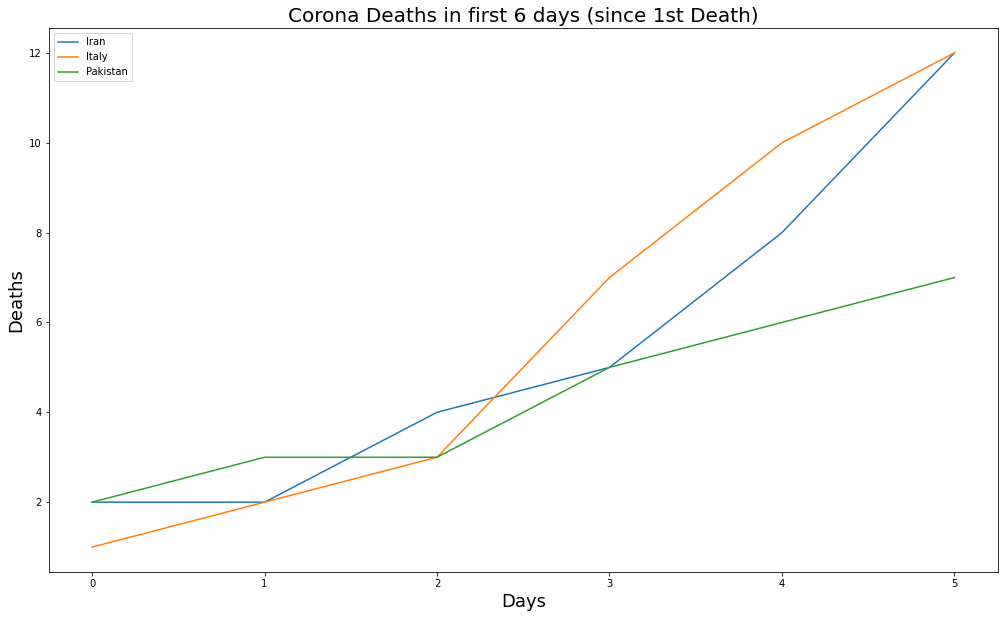

In [7]:
pd.DataFrame({"Iran" : list(df.Iran[df.Iran != 0][:6]), 
              "Italy" : list(df.Italy[df.Italy != 0][:6]),
              "Pakistan" : list(df.Pakistan[df.Pakistan != 0][:6])
#               "China" : list(df.China[df.China != 0][:6])
             }).plot(figsize=(17,10))
plt.title("Corona Deaths in first 6 days (since 1st Death)", fontsize=20)
plt.xlabel("Days", fontsize=18)
plt.ylabel("Deaths", fontsize=18)